In [82]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('../csv/All_Demand.csv', index_col=0)
df = df.drop(['Unnamed: 0.1'], axis=1)
df['Record Date'] = pd.to_datetime(df['Record Date'])
df = df.drop(index=1825)
df = df.sort_values('Record Date')
df = df.set_index("Record Date")
df1 = df[['Total Demand']].copy()
df1 =  df1.interpolate()
df1 = df1[1:]

In [94]:
# df['WeekDay'] = df['Record Date'].dt.month

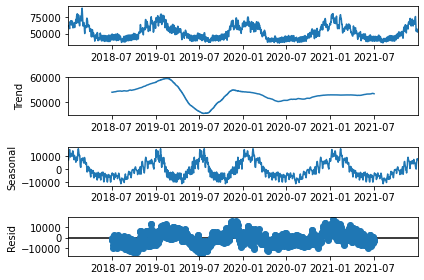

<Figure size 432x288 with 0 Axes>

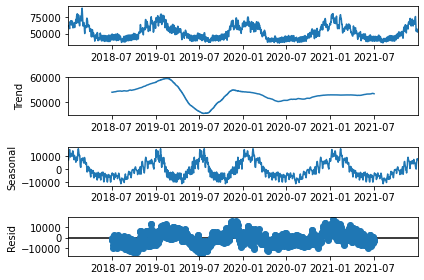

In [116]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt 

plt.figure()
result = seasonal_decompose(df1, model='additive', period=365)
result.plot()

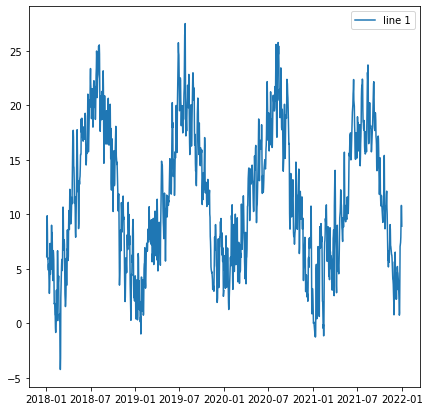

In [123]:
plt.figure(figsize=(7, 7))
plt.plot(df.index, df['Air Temperature'], label = "line 1")
plt.legend()
plt.show()

# 

In [71]:
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [124]:

X = df1.values
train, test = X[1:len(X)-30], X[len(X)-30:]

# train autoregression
model = AR(train)
model_fit = model.fit()

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, actual=%f' % (predictions[i], test[i]))

predicted=66603.962765, actual=70238.000000
predicted=65328.821667, actual=71784.000000
predicted=60058.716163, actual=61493.000000
predicted=58773.664756, actual=62539.000000
predicted=65078.678766, actual=69489.000000
predicted=66034.437315, actual=70212.000000
predicted=64894.002205, actual=70810.000000
predicted=64665.950518, actual=71875.000000
predicted=64147.570837, actual=70884.000000
predicted=60536.838646, actual=66061.000000
predicted=59964.667864, actual=61453.000000
predicted=66653.315942, actual=67065.000000
predicted=67484.631898, actual=69332.000000
predicted=64879.420248, actual=69180.000000
predicted=64163.453170, actual=68516.000000
predicted=63219.568073, actual=68220.000000
predicted=58895.063174, actual=64158.000000
predicted=58451.336670, actual=64152.000000
predicted=64418.656214, actual=71272.000000
predicted=65310.459894, actual=73845.000000
predicted=64012.065481, actual=75829.000000
predicted=63912.550031, actual=69850.000000
predicted=63449.413928, actual=6

/Users/daniilsaleksasins/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_

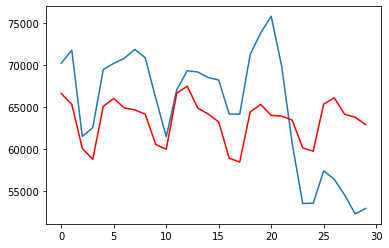

In [125]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [126]:
rmse = mean_squared_error(test, predictions, squared=False)
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6499.069


In [127]:
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)

Test MAE: 5839.716
